### Surya Teja Pidakala
### U99286608

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os
import datetime as dt
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
import seaborn as sns


In [2]:
mrf = pd.read_csv("C:/Users/suman/Downloads/mrfdata.csv")

In [3]:
mrf

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/25/2022,68550.00000,69499.00000,68235.35156,69115.89844,68987.04688,9387
1,4/26/2022,69500.00000,71537.89844,69225.00000,71331.50000,71198.51563,16723
2,4/27/2022,70315.00000,72599.89844,70200.00000,72218.95313,72084.31250,14670
3,4/28/2022,72648.00000,72648.00000,71254.00000,72330.70313,72195.85938,11877
4,4/29/2022,72330.00000,73400.00000,71801.29688,72729.00000,72593.40625,11934
...,...,...,...,...,...,...,...
95,9/9/2022,85838.35156,85990.00000,84013.00000,84208.04688,84202.33594,6406
96,9/12/2022,84550.00000,85900.00000,84250.00000,85808.29688,85802.47656,8568
97,9/13/2022,86000.10156,86350.00000,85315.04688,85551.25000,85545.44531,5533
98,9/14/2022,83750.00000,86444.04688,83750.00000,86071.70313,86065.86719,9618


In [4]:
mrf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [5]:
#We will use the closing price of each stock. So dropping all unnecessary columns.

mrf =mrf[mrf.columns.difference(['Open', 'High', 'Low', 'Adj Close', 'Volume'])].reset_index()

In [6]:
mrf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   Close   100 non-null    float64
 2   Date    100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


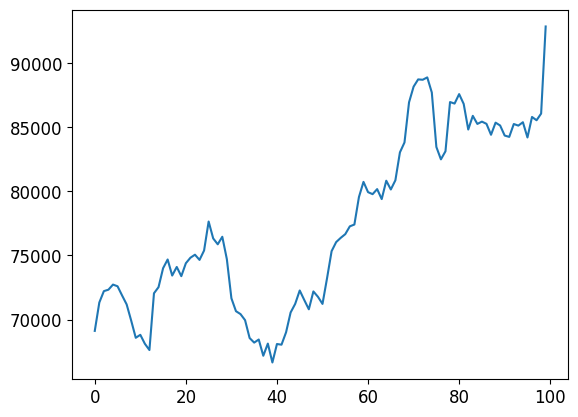

In [7]:
#Plot close

plt.plot(mrf['Close'])
plt.show()

# RESHAPE the data set!

In [8]:
mrf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   Close   100 non-null    float64
 2   Date    100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [9]:
mrf = mrf.drop(['index'], axis=1)

In [10]:
mrf.shape

(100, 2)

In [11]:
mrf.groupby(['Date']).count()

,Close
Date,
4/25/2022,1
4/26/2022,1
4/27/2022,1
4/28/2022,1
4/29/2022,1
...,...
9/5/2022,1
9/6/2022,1
9/7/2022,1


In [12]:
mrf.head(5)

,Close,Date
0,69115.89844,4/25/2022
1,71331.50000,4/26/2022
2,72218.95313,4/27/2022
3,72330.70313,4/28/2022
4,72729.00000,4/29/2022


<Axes: xlabel='Date', ylabel='Close'>

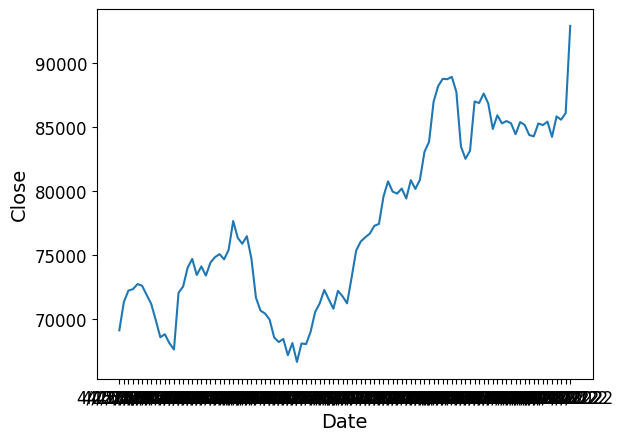

In [14]:
plt.figure
sns.lineplot(x='Date', y='Close',data=mrf)

In [15]:
mrf.head(10)

,Close,Date
0,69115.89844,4/25/2022
1,71331.50000,4/26/2022
2,72218.95313,4/27/2022
3,72330.70313,4/28/2022
4,72729.00000,4/29/2022
5,72597.50000,5/2/2022
6,71878.35156,5/4/2022
7,71182.14844,5/5/2022
8,69913.60156,5/6/2022
9,68578.00000,5/9/2022


In [16]:
# Re-organize the data set by day and hours

temp = np.array(mrf['Close']).reshape(10,10)
temp

array([[69115.89844, 71331.5    , 72218.95313, 72330.70313, 72729.     ,
        72597.5    , 71878.35156, 71182.14844, 69913.60156, 68578.     ],
       [68810.04688, 68110.70313, 67622.04688, 72050.89844, 72528.39844,
        74006.75   , 74687.64844, 73434.75   , 74104.95313, 73386.20313],
       [74395.5    , 74824.25   , 75060.95313, 74654.85156, 75388.04688,
        77649.45313, 76331.5    , 75872.79688, 76460.35156, 74712.29688],
       [71659.     , 70653.54688, 70425.75   , 69952.25   , 68558.54688,
        68202.25   , 68441.70313, 67176.60156, 68124.54688, 66651.54688],
       [68091.54688, 68040.60156, 69006.20313, 70553.     , 71221.75   ,
        72268.64844, 71523.75   , 70800.89844, 72194.29688, 71776.45313],
       [71221.14844, 73230.20313, 75337.89844, 76044.95313, 76375.85156,
        76664.64844, 77273.75   , 77414.89844, 79558.10156, 80742.5    ],
       [79941.79688, 79784.60156, 80178.39844, 79400.60156, 80834.04688,
        80150.20313, 80864.95313, 83046.5    

In [98]:
mrf.shape

(100, 2)

In [17]:
# Convert to dataframe

mrf_temp = pd.DataFrame(temp, columns=np.arange(0,10,1))
mrf_temp

,0,1,2,3,4,5,6,7,8,9
0,69115.89844,71331.50000,72218.95313,72330.70313,72729.00000,72597.50000,71878.35156,71182.14844,69913.60156,68578.00000
1,68810.04688,68110.70313,67622.04688,72050.89844,72528.39844,74006.75000,74687.64844,73434.75000,74104.95313,73386.20313
2,74395.50000,74824.25000,75060.95313,74654.85156,75388.04688,77649.45313,76331.50000,75872.79688,76460.35156,74712.29688
3,71659.00000,70653.54688,70425.75000,69952.25000,68558.54688,68202.25000,68441.70313,67176.60156,68124.54688,66651.54688
4,68091.54688,68040.60156,69006.20313,70553.00000,71221.75000,72268.64844,71523.75000,70800.89844,72194.29688,71776.45313
5,71221.14844,73230.20313,75337.89844,76044.95313,76375.85156,76664.64844,77273.75000,77414.89844,79558.10156,80742.50000
6,79941.79688,79784.60156,80178.39844,79400.60156,80834.04688,80150.20313,80864.95313,83046.50000,83818.14844,86950.35156
7,88173.14844,88738.95313,88711.79688,88895.45313,87717.50000,83466.60156,82500.70313,83130.85156,86971.45313,86853.60156
8,87591.54688,86825.89844,84828.25000,85895.45313,85264.50000,85445.00000,85272.25000,84418.64844,85364.95313,85142.75000
9,84356.89844,84254.04688,85257.70313,85133.29688,85396.39844,84208.04688,85808.29688,85551.25000,86071.70313,92868.45313


### Reshaping for Standardization

In [18]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(mrf_temp).ravel().reshape(-1,1)
temp_1feature.shape

(100, 1)

In [19]:
temp_1feature

array([[69115.89844],
       [71331.5    ],
       [72218.95313],
       [72330.70313],
       [72729.     ],
       [72597.5    ],
       [71878.35156],
       [71182.14844],
       [69913.60156],
       [68578.     ],
       [68810.04688],
       [68110.70313],
       [67622.04688],
       [72050.89844],
       [72528.39844],
       [74006.75   ],
       [74687.64844],
       [73434.75   ],
       [74104.95313],
       [73386.20313],
       [74395.5    ],
       [74824.25   ],
       [75060.95313],
       [74654.85156],
       [75388.04688],
       [77649.45313],
       [76331.5    ],
       [75872.79688],
       [76460.35156],
       [74712.29688],
       [71659.     ],
       [70653.54688],
       [70425.75   ],
       [69952.25   ],
       [68558.54688],
       [68202.25   ],
       [68441.70313],
       [67176.60156],
       [68124.54688],
       [66651.54688],
       [68091.54688],
       [68040.60156],
       [69006.20313],
       [70553.     ],
       [71221.75   ],
       [72

## Standardize the values

In [20]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

In [21]:
temp_reshaped = temp_std.reshape(10,10)
temp_reshaped.shape

(10, 10)

In [22]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-1.209875,-0.886385,-0.756812,-0.740496,-0.682342,-0.701542,-0.806542,-0.908191,-1.093406,-1.288411
1,-1.254531,-1.356639,-1.427986,-0.781349,-0.711631,-0.495784,-0.396369,-0.579299,-0.481445,-0.586387
2,-0.439024,-0.376424,-0.341864,-0.401157,-0.294107,0.036071,-0.156357,-0.223330,-0.137544,-0.392770
3,-0.838568,-0.985370,-1.018629,-1.087763,-1.291251,-1.343273,-1.308311,-1.493023,-1.354618,-1.569684
4,-1.359436,-1.366874,-1.225891,-1.000050,-0.902409,-0.749556,-0.858315,-0.963856,-0.760412,-0.821419
5,-0.902497,-0.609164,-0.301429,-0.198195,-0.149882,-0.107716,-0.018783,0.001825,0.314745,0.487673
6,0.370766,0.347815,0.405311,0.291749,0.501040,0.401195,0.505552,0.824070,0.936735,1.394054
7,1.572589,1.655200,1.651235,1.678050,1.506062,0.885407,0.744381,0.836386,1.397135,1.379928
8,1.487672,1.375883,1.084215,1.240033,1.147910,1.174264,1.149042,1.024411,1.162577,1.130134
9,1.015395,1.000379,1.146918,1.128754,1.167168,0.993662,1.227308,1.189777,1.265766,2.258130


### Data Split

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_reshaped, test_size=0.3)

In [24]:
train.shape

(7, 10)

In [25]:
test.shape

(3, 10)

## Create Input and Target values

In [26]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,-1.209875,-0.886385,-0.756812,-0.740496,-0.682342,-0.701542,-0.806542,-0.908191,-1.093406
1,1.572589,1.655200,1.651235,1.678050,1.506062,0.885407,0.744381,0.836386,1.397135
2,-0.439024,-0.376424,-0.341864,-0.401157,-0.294107,0.036071,-0.156357,-0.223330,-0.137544
3,1.015395,1.000379,1.146918,1.128754,1.167168,0.993662,1.227308,1.189777,1.265766
4,-1.359436,-1.366874,-1.225891,-1.000050,-0.902409,-0.749556,-0.858315,-0.963856,-0.760412
5,-0.838568,-0.985370,-1.018629,-1.087763,-1.291251,-1.343273,-1.308311,-1.493023,-1.354618
6,0.370766,0.347815,0.405311,0.291749,0.501040,0.401195,0.505552,0.824070,0.936735


#### Adding one more dimension  to make it ready for RNNs

In [27]:
train_inputs

array([[-1.209875  , -0.8863849 , -0.75681183, -0.74049571, -0.68234216,
        -0.70154189, -0.80654154, -0.90819106, -1.09340593],
       [ 1.57258909,  1.65519971,  1.65123474,  1.67804957,  1.50606189,
         0.88540716,  0.74438064,  0.8363858 ,  1.39713491],
       [-0.43902392, -0.37642405, -0.34186408, -0.40115716, -0.29410658,
         0.03607126, -0.1563572 , -0.22333039, -0.13754416],
       [ 1.01539544,  1.00037854,  1.14691792,  1.12875392,  1.1671682 ,
         0.99366229,  1.22730766,  1.18977739,  1.26576643],
       [-1.35943601, -1.36687431, -1.22589113, -1.00005021, -0.90240901,
        -0.74955604, -0.85831534, -0.96385567, -0.76041178],
       [-0.83856809, -0.98536981, -1.01862942, -1.08776304, -1.29125142,
        -1.34327274, -1.30831126, -1.49302309, -1.35461783],
       [ 0.37076615,  0.34781476,  0.40531129,  0.29174864,  0.50103959,
         0.40119462,  0.50555208,  0.82407001,  0.93673496]])

In [28]:
train_inputs.shape 

(7, 9)

In [29]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [30]:
train_x

array([[[-1.209875  ],
        [-0.8863849 ],
        [-0.75681183],
        [-0.74049571],
        [-0.68234216],
        [-0.70154189],
        [-0.80654154],
        [-0.90819106],
        [-1.09340593]],

       [[ 1.57258909],
        [ 1.65519971],
        [ 1.65123474],
        [ 1.67804957],
        [ 1.50606189],
        [ 0.88540716],
        [ 0.74438064],
        [ 0.8363858 ],
        [ 1.39713491]],

       [[-0.43902392],
        [-0.37642405],
        [-0.34186408],
        [-0.40115716],
        [-0.29410658],
        [ 0.03607126],
        [-0.1563572 ],
        [-0.22333039],
        [-0.13754416]],

       [[ 1.01539544],
        [ 1.00037854],
        [ 1.14691792],
        [ 1.12875392],
        [ 1.1671682 ],
        [ 0.99366229],
        [ 1.22730766],
        [ 1.18977739],
        [ 1.26576643]],

       [[-1.35943601],
        [-1.36687431],
        [-1.22589113],
        [-1.00005021],
        [-0.90240901],
        [-0.74955604],
        [-0.85831534],
   

### Setting the target

In [31]:
train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-1.288411
1,1.379928
2,-0.392770
3,2.258130
4,-0.821419
5,-1.569684
6,1.394054


### Repeat for testing

In [32]:
test.shape

(3, 10)

In [33]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [34]:
#Create an additional dimension for test

test_x = test_inputs[...,np.newaxis]

test_x.shape 

(3, 9, 1)

In [35]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,1.130134
1,-0.586387
2,0.487673


# A normal(cross-sectional) NN

In [36]:
model = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 661ms/step - loss: 1.0595
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 1.0028
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9483
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8962
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8465
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7992
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7544
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7121
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6728
Epoch 10/100
1/1 [==============================] - 0s 48ms/step - loss: 0.6362
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6022
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5704
Epoch 13/100
1/1 [==============================] - 

### Predictions

In [37]:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 171ms/step


In [38]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()
comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [39]:
comparison

,actual,predicted
0,85142.75000,89949.929688
1,73386.20313,69838.921875
2,80742.50000,75337.812500


In [40]:
mean_squared_error(comparison['actual'], comparison['predicted'])

21634275.940881062

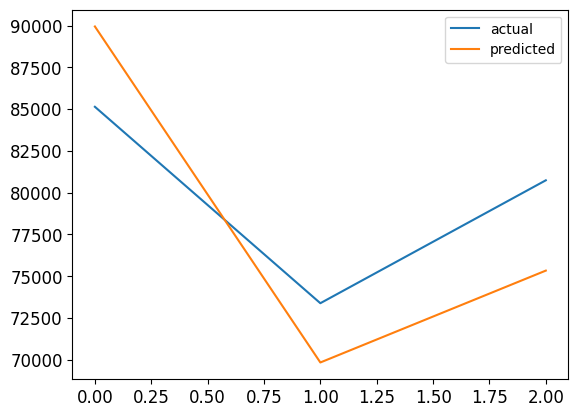

In [41]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN

In [42]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.9815
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 1.9022
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 1.8274
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 1.7574
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 1.6937
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 1.6318
Epoch 7/30
1/1 [==============================] - 0s 24ms/step - loss: 1.5707
Epoch 8/30
1/1 [==============================] - 0s 40ms/step - loss: 1.5115
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 1.4535
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 1.3964
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 1.3401
Epoch 12/30
1/1 [==============================] - 0s 9ms/step - loss: 1.2840
Epoch 13/30
1/1 [==============================] - 0s 7ms/step - l

### Predictions

In [44]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 287ms/step


In [45]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()
comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [46]:
comparison

,actual,predicted
0,85142.75000,84006.328125
1,73386.20313,70468.007812
2,80742.50000,76710.343750


In [47]:
mean_squared_error(comparison['actual'], comparison['predicted'])

8688534.20449049

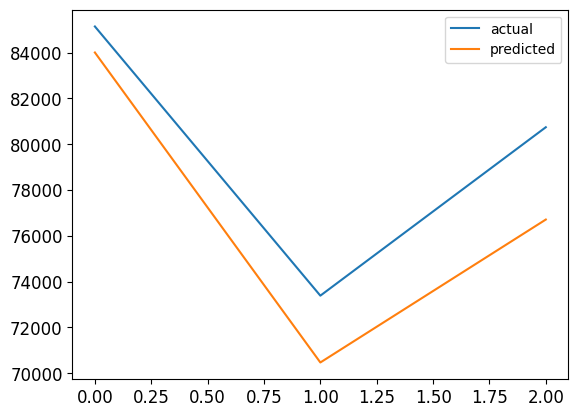

In [48]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

##  Simple RNN with more layers

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.9862
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 1.8796
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 1.7818
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 1.6918
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 1.6087
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 1.5284
Epoch 7/30
1/1 [==============================] - 0s 24ms/step - loss: 1.4487
Epoch 8/30
1/1 [==============================] - 0s 8ms/step - loss: 1.3703
Epoch 9/30
1/1 [==============================] - 0s 64ms/step - loss: 1.2934
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 1.2198
Epoch 11/30
1/1 [==============================] - 0s 18ms/step - loss: 1.1500
Epoch 12/30
1/1 [==============================] - 0s 7ms/step - loss: 1.0870
Epoch 13/30
1/1 [==============================] - 0s 8ms/step - l

In [51]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 546ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()
comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
comparison

,actual,predicted
0,85142.75000,83046.515625
1,73386.20313,72773.750000
2,80742.50000,78220.273438


In [54]:
mean_squared_error(comparison['actual'], comparison['predicted'])

3710308.074652999

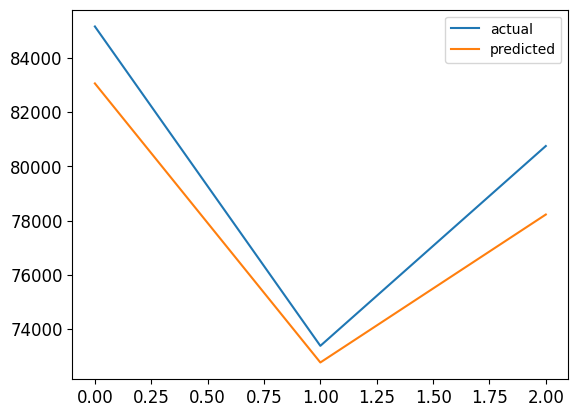

In [55]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [56]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.9277
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 1.8962
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 1.8647
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 1.8331
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 1.8015
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 1.7702
Epoch 7/30
1/1 [==============================] - 0s 8ms/step - loss: 1.7394
Epoch 8/30
1/1 [==============================] - 0s 16ms/step - loss: 1.7089
Epoch 9/30
1/1 [==============================] - 0s 20ms/step - loss: 1.6783
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 1.6478
Epoch 11/30
1/1 [==============================] - 0s 24ms/step - loss: 1.6173
Epoch 12/30
1/1 [==============================] - 0s 16ms/step - loss: 1.5871
Epoch 13/30
1/1 [==============================] - 0s 16ms/step - l

### Predict

In [58]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 298ms/step


In [59]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()
comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [60]:
comparison

,actual,predicted
0,85142.75000,80280.367188
1,73386.20313,73908.117188
2,80742.50000,76656.515625


In [61]:
mean_squared_error(comparison['actual'], comparison['predicted'])

13536809.737151891

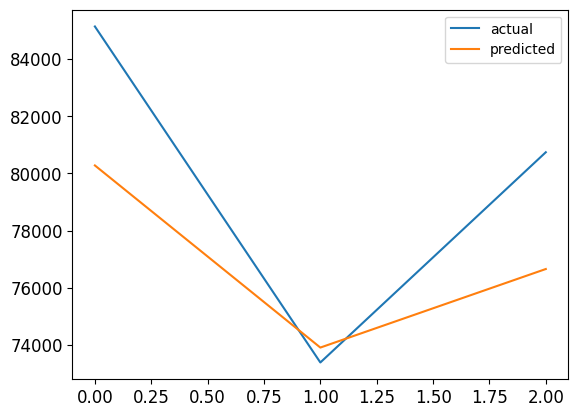

In [62]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### LSTM with more layers

In [63]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [64]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 1.8931
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 1.8239
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 1.7557
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 1.6881
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 1.6206
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 1.5529
Epoch 7/30
1/1 [==============================] - 0s 16ms/step - loss: 1.4846
Epoch 8/30
1/1 [==============================] - 0s 16ms/step - loss: 1.4154
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 1.3451
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 1.2735
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 1.2003
Epoch 12/30
1/1 [==============================] - 0s 8ms/step - loss: 1.1256
Epoch 13/30
1/1 [==============================] - 0s 16ms/step 

### Predcitions

In [65]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [66]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()
comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [67]:
comparison

,actual,predicted
0,85142.75000,92690.281250
1,73386.20313,70010.695312
2,80742.50000,75102.226562


In [68]:
mean_squared_error(comparison['actual'], comparison['predicted'])

33390655.1484994

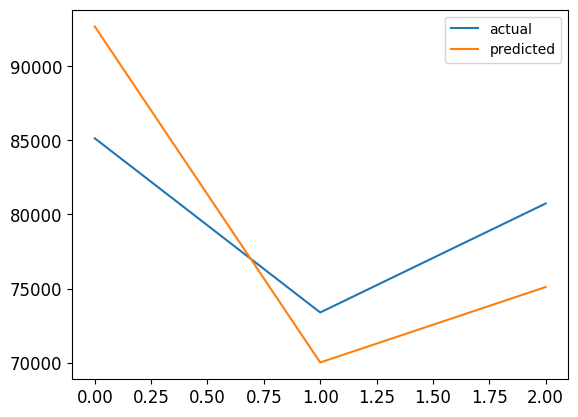

In [69]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### GRU (with more layers)

In [70]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [71]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 2.1534
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 2.0207
Epoch 3/30
1/1 [==============================] - 0s 17ms/step - loss: 1.9217
Epoch 4/30
1/1 [==============================] - 0s 24ms/step - loss: 1.8528
Epoch 5/30
1/1 [==============================] - 0s 24ms/step - loss: 1.7916
Epoch 6/30
1/1 [==============================] - 0s 32ms/step - loss: 1.7254
Epoch 7/30
1/1 [==============================] - 0s 20ms/step - loss: 1.6637
Epoch 8/30
1/1 [==============================] - 0s 24ms/step - loss: 1.6032
Epoch 9/30
1/1 [==============================] - 0s 57ms/step - loss: 1.5442
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 1.4857
Epoch 11/30
1/1 [==============================] - 0s 34ms/step - loss: 1.4274
Epoch 12/30
1/1 [==============================] - 0s 15ms/step - loss: 1.3649
Epoch 13/30
1/1 [==============================] - 0s 88ms/step

### Predictions

In [72]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 612ms/step


In [73]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()
comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [74]:
comparison

,actual,predicted
0,85142.75000,89389.937500
1,73386.20313,73637.539062
2,80742.50000,76955.031250


In [75]:
mean_squared_error(comparison['actual'], comparison['predicted'])

10815563.64778282

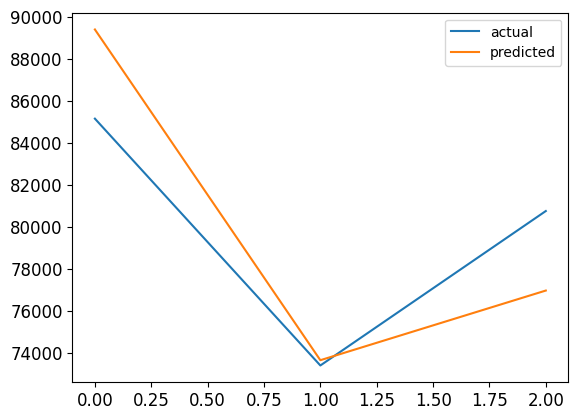

In [76]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### Conv1D

In [77]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [78]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 2.1256
Epoch 2/30
1/1 [==============================] - 0s 56ms/step - loss: 2.0661
Epoch 3/30
1/1 [==============================] - 0s 48ms/step - loss: 2.0081
Epoch 4/30
1/1 [==============================] - 0s 88ms/step - loss: 1.9505
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 1.8938
Epoch 6/30
1/1 [==============================] - 0s 24ms/step - loss: 1.8394
Epoch 7/30
1/1 [==============================] - 0s 17ms/step - loss: 1.7857
Epoch 8/30
1/1 [==============================] - 0s 16ms/step - loss: 1.7306
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 1.6760
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 1.6245
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 1.5787
Epoch 12/30
1/1 [==============================] - 0s 20ms/step - loss: 1.5332
Epoch 13/30
1/1 [==============================] - 0s 16ms/step

### Predictions

In [79]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 651ms/step


In [80]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()
comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [81]:
comparison

,actual,predicted
0,85142.75000,89189.523438
1,73386.20313,76088.289062
2,80742.50000,77970.726562


In [82]:
mean_squared_error(comparison['actual'], comparison['predicted'])

10453457.209966853

# ANALYSIS

Following are the conclusions that can br drawn form above analysis

* CNN has the best RMSE value of the entire lot and it is 3710308.07465299. 
* The LSTM model with 1 layer has a RMSE of 10815563.6477828 and with the addition of multiple layers, the RMSE has become 10453457.2099668. This indicate that the LSTM performed well with multiple layers on the given data.
* Normal NN and Simple RNN have consideraably higher RMSE values which are 33390655.1484994 and 21634275.940881 respectively.
* RNN with multiple layers has performed better that RNN with a single layer.
* NOTE: RMSE is only one of the factors while finalizing the model. The other factors that are worth considering are Execution Time, Complexity, Inference time, etc 